In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('vaers_jan_nov_2021.csv', low_memory=False)

In [4]:
df

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890831,1845800,Urinary tract infection,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,none,none,NaN,NaN,2,11/05/2021,NaN,NaN,Y,"SUlfa, Penicillin"
890832,1845801,Chest discomfort,24.1,Cough,24.1,Nausea,24.1,Pain,24.1,Vomiting,...,Reaction to first Pfizer Covid Injection - Adv...,Tetrology of Fallot Repair,"Pfizer Covid first dose. Oct 11, 2021. Eyelid ...",NaN,2,11/05/2021,NaN,NaN,NaN,Latex
890833,1845802,Device connection issue,24.1,Injection site erythema,24.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,11/05/2021,NaN,NaN,NaN,NaN
890834,1845803,Fatigue,24.1,Headache,24.1,Pain,24.1,Urticaria,24.1,NaN,...,none,High BP Migraines Depression Anxiety Aci...,hives,NaN,2,11/05/2021,NaN,NaN,NaN,Pineapple


### Plan for EDA: Descriptive stats -> Check case duplicates -> Gender analysis -> Age analysis -> Producer analisys -> Outcome analysis -> Symptom analysis

In [5]:
df.describe()

,VAERS_ID,SYMPTOMVERSION1,SYMPTOMVERSION2,SYMPTOMVERSION3,SYMPTOMVERSION4,SYMPTOMVERSION5,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS
count,8.908360e+05,890836.000000,700014.000000,542889.000000,414887.000000,311516.000000,819268.000000,728957.000000,1327.000000,65176.000000,799488.000000,890836.000000
mean,1.348523e+06,23.938168,23.938262,23.937684,23.939902,23.940053,50.053790,49.768582,0.061567,21.109120,28.330898,1.999589
std,2.682631e+05,0.250567,0.250345,0.251181,0.249035,0.250619,18.574649,18.740089,0.157421,1238.533017,595.442248,0.020265
min,9.166000e+05,23.100000,23.100000,23.100000,23.100000,23.100000,0.080000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.120193e+06,24.000000,24.000000,24.000000,24.000000,24.000000,36.000000,35.000000,0.000000,2.000000,0.000000,2.000000
50%,1.316782e+06,24.000000,24.000000,24.000000,24.000000,24.000000,50.000000,50.000000,0.000000,3.000000,1.000000,2.000000
75%,1.587308e+06,24.000000,24.000000,24.000000,24.000000,24.000000,65.000000,64.000000,0.000000,7.000000,7.000000,2.000000
max,1.845804e+06,24.100000,24.100000,24.100000,24.100000,24.100000,119.000000,120.000000,1.000000,99999.000000,44224.000000,2.000000


In [6]:
df.columns

Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE',
       'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'VAX_NAME', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [7]:
# We have 633063 unique VAERS_IDs, which tells us that around 29% of cases include multiple sypmtoms.  
df['VAERS_ID'].nunique()

633063

In [11]:
temp=df[df.DIED=='Y']

In [12]:
temp['VAERS_ID'].nunique()

8440

In [13]:
df.groupby('DIED').filter(lambda x: len(x['VAERS_ID'].unique()) > 0)['DIED']

657       Y
1493      Y
1496      Y
1867      Y
2143      Y
         ..
890447    Y
890518    Y
890647    Y
890656    Y
890658    Y
Name: DIED, Length: 15824, dtype: object

In [14]:
# So for case when respondent actually died we see that (15824-8440)/15824 or around 47% respondents 
# had multiple symptoms under one VAERS_ID

In [15]:
# Create a unique_df with only unique cases in order to analyze gender, age and outcomes distributions
unique_df=df.drop_duplicates(subset=['VAERS_ID'])

In [16]:
unique_df.shape

(633063, 52)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
unique_df['DIED']=unique_df['DIED'].fillna('N')

<ipython-input-18-318a0a9a708e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df['DIED']=unique_df['DIED'].fillna('N')


In [19]:
unique_df[unique_df.DIED!='Y'].groupby(['SEX'])['VAERS_ID'].count().values


array([425805, 177343,  21475], dtype=int64)

In [20]:
unique_df[unique_df.DIED!='Y'].groupby(['SEX'])['VAERS_ID'].count().index

Index(['F', 'M', 'U'], dtype='object', name='SEX')

In [21]:
unique_df_all=unique_df.groupby(['SEX'])['VAERS_ID'].count().reset_index()

In [22]:
unique_df_all['Percent']=round(unique_df_all['VAERS_ID']/unique_df_all['VAERS_ID'].sum()*100, 1)

In [23]:
unique_df_all

,SEX,VAERS_ID,Percent
0,F,429324,67.8
1,M,181877,28.7
2,U,21862,3.5


In [24]:
unique_df_survivors=unique_df[unique_df.DIED!='Y'].groupby(['SEX'])['VAERS_ID'].count().reset_index()

In [25]:
unique_df_survivors['Percent']=round(unique_df_survivors['VAERS_ID']/unique_df_survivors['VAERS_ID'].sum()*100, 1)

In [26]:
unique_df_survivors

,SEX,VAERS_ID,Percent
0,F,425805,68.2
1,M,177343,28.4
2,U,21475,3.4


In [27]:
unique_df_died=unique_df[unique_df.DIED=='Y'].groupby(['SEX'])['VAERS_ID'].count().reset_index()

In [28]:
unique_df_died['Percent']=round(unique_df_died['VAERS_ID']/unique_df_died['VAERS_ID'].sum()*100, 1)

In [29]:
unique_df_died

,SEX,VAERS_ID,Percent
0,F,3519,41.7
1,M,4534,53.7
2,U,387,4.6


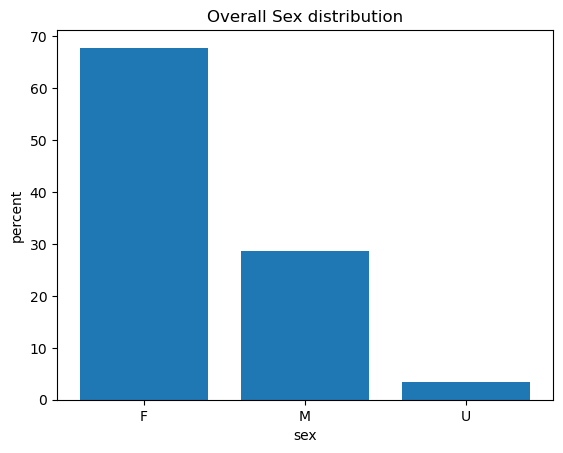

In [30]:
plt.bar(unique_df_all['SEX'], unique_df_all['Percent'])
#plt.legend()
plt.title('Overall Sex distribution')
plt.xlabel('sex')
plt.ylabel('percent')
plt.show()

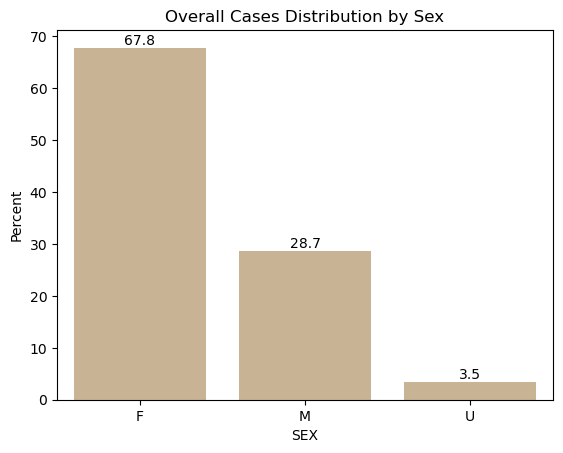

In [31]:
#Plot overall cases distridution by gender
import seaborn as sns
ax=sns.barplot(x="SEX", y='Percent', color="tan", data=unique_df_all)#.set(title='Overall Sex Distribution')
ax.bar_label(ax.containers[0])
ax.set(title='Overall Cases Distribution by Sex')
plt.show()

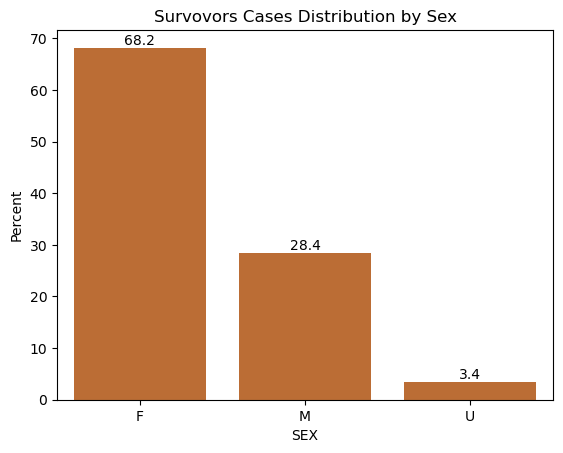

In [32]:
#Plot survived cases distridution by gender
bx=sns.barplot(x="SEX", y='Percent', data=unique_df_survivors, color='chocolate')
bx.bar_label(bx.containers[0])
bx.set(title='Survovors Cases Distribution by Sex')
plt.show()

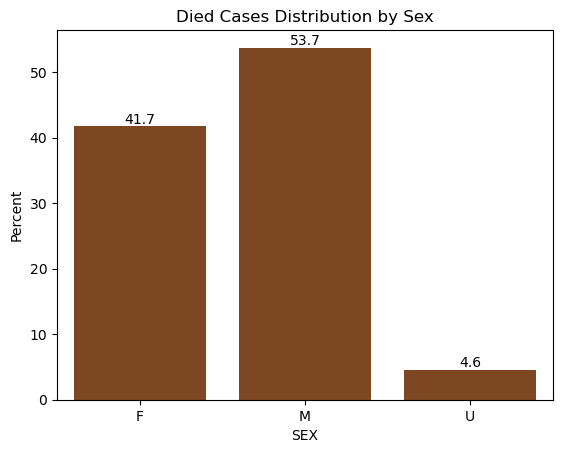

In [33]:
#Plot died cases distridution by gender
cx=sns.barplot(x="SEX", y='Percent', data=unique_df_died, color='saddlebrown')
cx.bar_label(cx.containers[0])
cx.set(title='Died Cases Distribution by Sex')
plt.show()

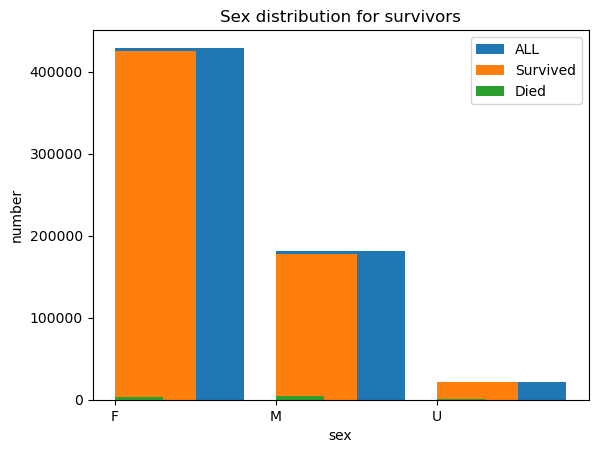

In [34]:
plt.bar(unique_df.groupby(['SEX'])['VAERS_ID'].count().index, unique_df.groupby(['SEX'])['VAERS_ID'].count().values, align='edge', label= 'ALL')
plt.bar(unique_df[unique_df.DIED!='Y'].groupby(['SEX'])['VAERS_ID'].count().index, unique_df[unique_df.DIED!='Y'].groupby(['SEX'])['VAERS_ID'].count().values, width=0.5, align='edge', label= 'Survived')
plt.bar(unique_df[unique_df.DIED=='Y'].groupby(['SEX'])['VAERS_ID'].count().index, unique_df[unique_df.DIED=='Y'].groupby(['SEX'])['VAERS_ID'].count().values, width=0.3, align='edge', label= 'Died')
plt.legend()
plt.title('Sex distribution for survivors')
plt.xlabel('sex')
plt.ylabel('number')
plt.show()

### Overall cases distribution by sex and survivors cases distribution by sex are very similar with clear prevalence of female patients, at the same time in distribution of died patients male cases take over 53%. 

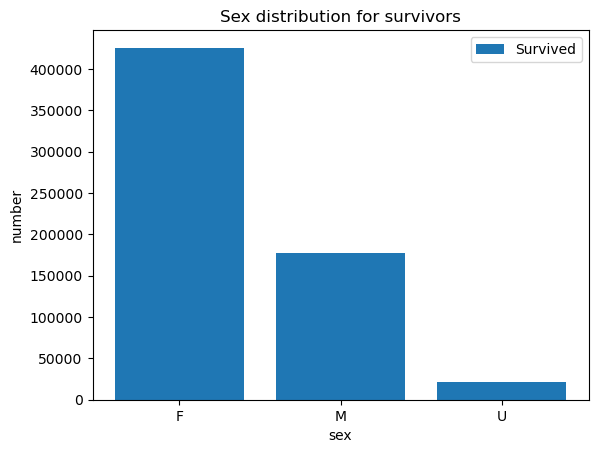

In [35]:
plt.bar(unique_df[unique_df.DIED!='Y'].groupby(['SEX'])['VAERS_ID'].count().index, unique_df[unique_df.DIED!='Y'].groupby(['SEX'])['VAERS_ID'].count().values, label= 'Survived')
#plt.bar(unique_df[unique_df.DIED=='Y'].groupby(['SEX'])['VAERS_ID'].count().index, unique_df[unique_df.DIED=='Y'].groupby(['SEX'])['VAERS_ID'].count().values, label= 'Died')
plt.legend()
plt.title('Sex distribution for survivors')
plt.xlabel('sex')
plt.ylabel('number')
plt.show()

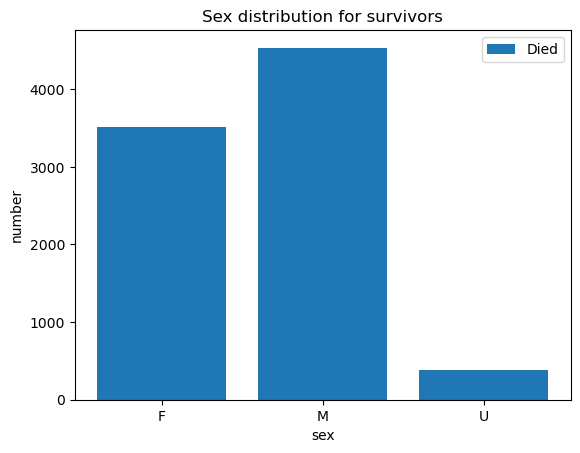

In [36]:
#plt.bar(unique_df[unique_df.DIED!='Y'].groupby(['SEX'])['VAERS_ID'].count().index, unique_df[unique_df.DIED!='Y'].groupby(['SEX'])['VAERS_ID'].count().values, label= 'Survived')
plt.bar(unique_df[unique_df.DIED=='Y'].groupby(['SEX'])['VAERS_ID'].count().index, unique_df[unique_df.DIED=='Y'].groupby(['SEX'])['VAERS_ID'].count().values, label= 'Died')
plt.legend()
plt.title('Sex distribution for survivors')
plt.xlabel('sex')
plt.ylabel('number')
plt.show()

In [37]:
unique_df['DIED'].unique()

array(['N', 'Y'], dtype=object)

In [38]:
new_df = unique_df.groupby(['SEX', 'DIED'])['VAERS_ID'].count()
#new_df = new_df.mul(100).rename('Percent').reset_index()

In [39]:
new_df

SEX  DIED
F    N       425805
     Y         3519
M    N       177343
     Y         4534
U    N        21475
     Y          387
Name: VAERS_ID, dtype: int64

In [40]:
new_df = new_df.rename('Case_number').reset_index()

In [41]:
new_df

,SEX,DIED,Case_number
0,F,N,425805
1,F,Y,3519
2,M,N,177343
3,M,Y,4534
4,U,N,21475
5,U,Y,387


In [42]:
new_df['Percent']=round(new_df['Case_number']/new_df['Case_number'].sum()*100, 1)

In [43]:
new_df

,SEX,DIED,Case_number,Percent
0,F,N,425805,67.3
1,F,Y,3519,0.6
2,M,N,177343,28.0
3,M,Y,4534,0.7
4,U,N,21475,3.4
5,U,Y,387,0.1


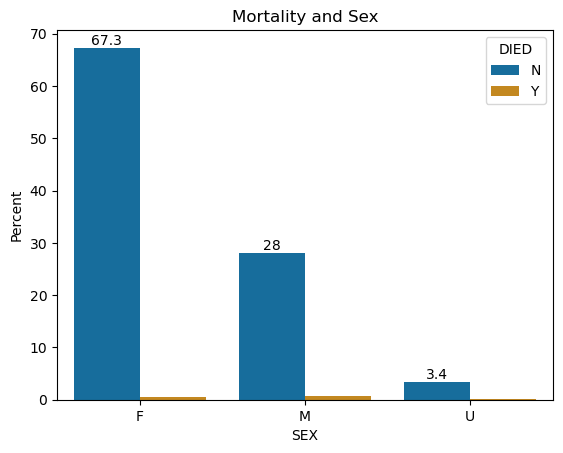

In [44]:
percents=sns.barplot(x="SEX", y='Percent', hue='DIED', palette='colorblind', data=new_df)#.set(title='Overall Sex Distribution')
percents.bar_label(percents.containers[0])
percents.set(title='Mortality and Sex')
plt.show()

### Age analysis

In [45]:
#Visualize age distribution for all unique cases 

In [46]:
#unique_df_age=unique_df.groupby(['AGE_YRS'])['VAERS_ID'].count().reset_index()

In [47]:
#unique_df_age

In [48]:
#unique_df['AGE_YRS'].values

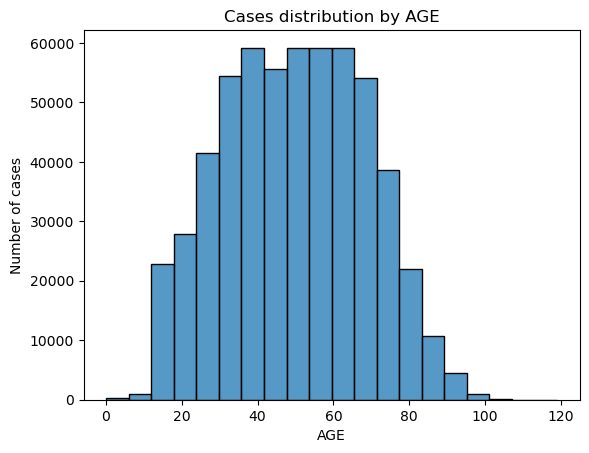

In [49]:
age_hist=sns.histplot(data=unique_df['AGE_YRS'].values, bins=20)
age_hist.set(title='Cases distribution by AGE')
age_hist.set_xlabel('AGE')
age_hist.set_ylabel('Number of cases')

plt.show()

In [50]:
unique_df['AGE_YRS'].describe()

count    570742.000000
mean         49.667679
std          18.754548
min           0.080000
25%          35.000000
50%          50.000000
75%          64.000000
max         119.000000
Name: AGE_YRS, dtype: float64

In [51]:
unique_df['AGE_YRS'].median()

50.0

In [52]:
### Age distribution is close to normal

In [53]:
#Age distribution for died patients

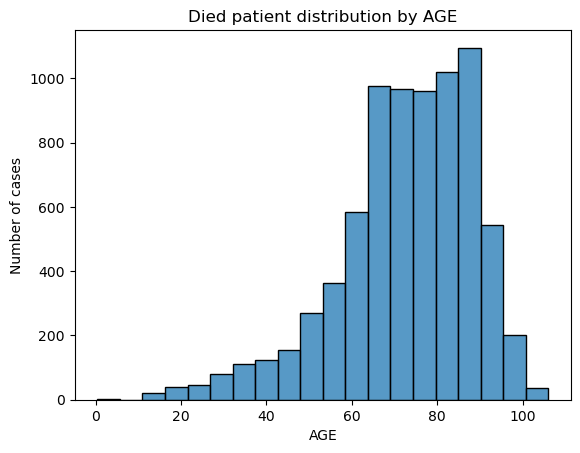

In [54]:
age_hist_died=sns.histplot(data=unique_df[unique_df.DIED=='Y']['AGE_YRS'].values, bins=20)
age_hist_died.set(title='Died patient distribution by AGE')
age_hist_died.set_xlabel('AGE')
age_hist_died.set_ylabel('Number of cases')

plt.show()

In [55]:
#The dictrubution is heabily scewed to the right side. HOW TO SAY SOME PERCENT IS OVER CERTAIN AGE?>??

In [56]:
data=pd.DataFrame(unique_df[unique_df.DIED=='Y']['AGE_YRS'])

In [57]:
data

,AGE_YRS
657,82.0
1493,90.0
1496,78.0
1867,64.0
2143,65.0
...,...
890447,NaN
890518,58.0
890647,NaN
890656,NaN


In [58]:
data.isna().sum()

AGE_YRS    844
dtype: int64

In [59]:
data=data.dropna()

In [60]:
data

,AGE_YRS
657,82.0
1493,90.0
1496,78.0
1867,64.0
2143,65.0
...,...
889762,78.0
889889,91.0
890031,40.0
890053,80.0


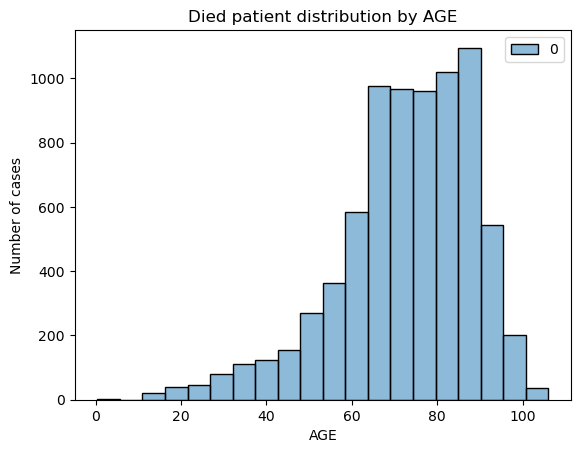

In [61]:
age_hist_died1=sns.histplot(data=data.values, bins=20)
age_hist_died1.set(title='Died patient distribution by AGE')
age_hist_died1.set_xlabel('AGE')
age_hist_died1.set_ylabel('Number of cases')

plt.show()

In [62]:
data.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.95])

,AGE_YRS
count,7596.000000
mean,72.690298
std,15.991990
min,0.420000
5%,40.000000
10%,51.000000
25%,64.000000
50%,75.000000
75%,84.000000
95%,94.000000


In [63]:
#So we see that 95% of patients who died were over 40, and half of all died patients was over 75 years old. 

In [64]:
#Let us see the number od cases by vaccine manufacturer

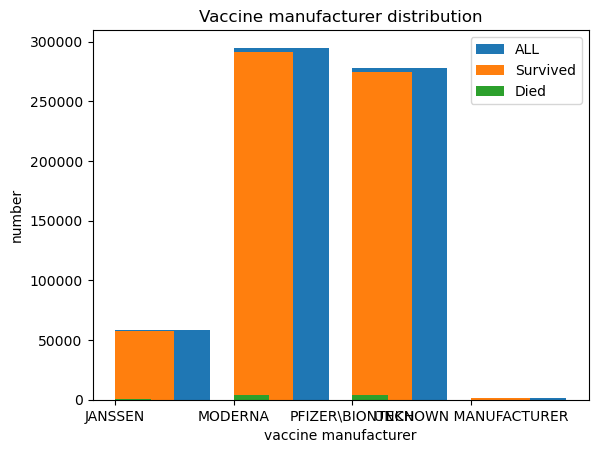

In [65]:
plt.bar(unique_df.groupby(['VAX_MANU'])['VAERS_ID'].count().index, unique_df.groupby(['VAX_MANU'])['VAERS_ID'].count().values, align='edge', label= 'ALL')
plt.bar(unique_df[unique_df.DIED!='Y'].groupby(['VAX_MANU'])['VAERS_ID'].count().index, unique_df[unique_df.DIED!='Y'].groupby(['VAX_MANU'])['VAERS_ID'].count().values, width=0.5, align='edge', label= 'Survived')
plt.bar(unique_df[unique_df.DIED=='Y'].groupby(['VAX_MANU'])['VAERS_ID'].count().index, unique_df[unique_df.DIED=='Y'].groupby(['VAX_MANU'])['VAERS_ID'].count().values, width=0.3, align='edge', label= 'Died')
plt.legend()
plt.title('Vaccine manufacturer distribution')
plt.xlabel('vaccine manufacturer')
plt.ylabel('number')
plt.show()

In [66]:
#To look at a broader picture let us replace missing values for columns where NaN clearly indicates the abcence of the event
#like hospital stay
#For sypmtoms - replace missing with N (for 'No') as we will still have at least one symptom available
#Drop all cases with SYMPTOM1=="Unevaluable event"
#Drop all cases with SYMPTOM_TEXT.isna()
#For DATEDIED replace NaN with N
#


In [67]:
unique_df_cropped=unique_df[unique_df.SYMPTOM1!='Unevaluable event']

In [75]:
unique_df_cropped=unique_df_cropped[~unique_df_cropped.SYMPTOM_TEXT.isna()]

In [ ]:
#CONTINUE FROM HERE

In [68]:
unique_df.isna().sum()

VAERS_ID                0
SYMPTOM1                0
SYMPTOMVERSION1         0
SYMPTOM2           128688
SYMPTOMVERSION2    128688
SYMPTOM3           238862
SYMPTOMVERSION3    238862
SYMPTOM4           332856
SYMPTOMVERSION4    332856
SYMPTOM5           411063
SYMPTOMVERSION5    411063
VAX_TYPE                0
VAX_MANU                0
VAX_LOT            197791
VAX_DOSE_SERIES      2471
VAX_ROUTE          150006
VAX_SITE           163785
VAX_NAME                0
RECVDATE                0
STATE               77999
AGE_YRS             62321
CAGE_YR            127308
CAGE_MO            631963
SEX                     0
RPT_DATE           632803
SYMPTOM_TEXT          143
DIED                    0
DATEDIED           625575
L_THREAT           623250
ER_VISIT           633024
HOSPITAL           593574
HOSPDAYS           606364
X_STAY             632739
DISABLE            623304
RECOVD              58455
VAX_DATE            42441
ONSET_DATE          49132
NUMDAYS             74166
LAB_DATA    

In [69]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
unique_df[unique_df.SYMPTOM_TEXT.isna()].head(143)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
33907,945204,Unevaluable event,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EJ1686,1,IM,AR,COVID19 (COVID19 (PFIZER-BIONTECH)),01/14/2021,WA,23.0,23.0,NaN,F,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/14/2021,01/14/2021,0.0,NaN,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,01/14/2021,NaN,NaN,NaN,NaN
38976,950337,Unevaluable event,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,NaN,1,NaN,LA,COVID19 (COVID19 (MODERNA)),01/16/2021,GA,70.0,70.0,NaN,F,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,01/16/2021,01/16/2021,0.0,NaN,PHM,NaN,NaN,NaN,NaN,NaN,NaN,2,01/16/2021,NaN,NaN,NaN,NaN
39015,950370,Unevaluable event,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,NaN,1,NaN,LA,COVID19 (COVID19 (MODERNA)),01/16/2021,GA,70.0,70.0,NaN,M,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,01/16/2021,01/16/2021,0.0,NaN,PHM,NaN,NaN,NaN,NaN,NaN,NaN,2,01/16/2021,NaN,Y,NaN,NaN
45506,955992,No adverse event,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,NaN,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/19/2021,AZ,73.0,NaN,NaN,M,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,PUB,NaN,COPD meds,COPD,"lung problems, COPD",NaN,NaN,2,01/19/2021,NaN,NaN,NaN,NaN
50275,959921,No adverse event,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,2,SYR,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/20/2021,CA,74.0,74.0,NaN,M,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2021,01/01/2021,0.0,NaN,UNK,NaN,NaN,NaN,NaN,NaN,NaN,2,01/20/2021,NaN,NaN,NaN,NaN
56708,965841,No adverse event,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,NaN,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/22/2021,AZ,40.0,40.0,NaN,F,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2021,01/01/2021,0.0,NaN,UNK,NaN,MULTI-VITAMIN,NaN,ASTHMA,NaN,NaN,2,01/22/2021,NaN,NaN,NaN,NaN
56880,965984,No adverse event,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,NaN,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/22/2021,AZ,66.0,66.0,NaN,F,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,01/22/2021,01/22/2021,0.0,na,PVT,NaN,NaN,"thyroid gland, depression and sizures thesame",the same as above,NaN,NaN,2,01/22/2021,NaN,NaN,NaN,codeine and pencilline
61273,969418,Unevaluable event,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),01/24/2021,NY,74.0,74.0,NaN,F,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/24/2021,01/24/2021,0.0,NaN,OTH,NaN,"Arnuity Ellipta 150 mcg, Hydrochlorothiazide ...",NaN,NaN,NaN,NaN,2,01/24/2021,NaN,NaN,NaN,"Ampicillin, Bactrim, Phenylephrine, strawberries"
63158,971092,Unevaluable event,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,2,SYR,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),01/25/2021,AZ,56.0,56.0,NaN,M,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,02/05/2021,NaN,NaN,NaN,PUB,NaN,NaN,NaN,yes I am diabetic and stable condition.,01/15/2021 Pfizer,NaN,2,01/25/2021,NaN,NaN,NaN,NaN
66652,974151,No adverse event,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,3249,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/26/2021,AZ,62.0,62.0,NaN,F,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,01/15/2021,01/26/2021,11.0,NaN,UNK,NaN,This is only one way to try to contact you abo...,NaN,NaN,NaN,NaN,2,01/26/2021,NaN,NaN,NaN,NaN


In [70]:
unique_df['SYMPTOM1'].nunique()

4898

In [71]:
unique_df[unique_df.SYMPTOM1=='Unevaluable event']

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
734,917176,Unevaluable event,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,EL0140,1,SYR,LA,COVID19 (COVID19 (MODERNA)),01/02/2021,NJ,61.0,61.0,NaN,F,NaN,None,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2021,01/02/2021,1.0,NaN,PVT,NaN,None,NaN,None,NaN,NaN,2,01/02/2021,NaN,NaN,NaN,None
856,917271,Unevaluable event,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,025J20A,1,IM,NaN,COVID19 (COVID19 (MODERNA)),01/02/2021,FL,80.0,80.0,NaN,M,NaN,Nothing yet,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,01/02/2021,01/02/2021,0.0,NaN,UNK,NaN,NaN,NaN,NaN,NaN,NaN,2,01/02/2021,NaN,NaN,NaN,NaN
1768,917994,Unevaluable event,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,NaN,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/03/2021,CO,72.0,72.0,NaN,M,NaN,None stated.,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2021,01/03/2021,2.0,NaN,WRK,NaN,NaN,NaN,NaN,NaN,NaN,2,01/03/2021,NaN,NaN,NaN,NaN
1823,918031,Unevaluable event,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,NaN,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/03/2021,NaN,NaN,NaN,NaN,U,NaN,None stated.,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNK,NaN,NaN,NaN,NaN,NaN,NaN,2,01/03/2021,NaN,NaN,NaN,NaN
2019,918283,Unevaluable event,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,037k20a,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/04/2021,TX,47.0,47.0,NaN,F,NaN,Modern a covid 19,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/24/2020,12/25/2020,1.0,None,PHM,NaN,75 mg amitriptyline Doxipen,None,Insomnia,NaN,NaN,2,01/04/2021,NaN,NaN,NaN,Procardia Macrobid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887016,1840340,Unevaluable event,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),11/03/2021,NaN,73.0,73.0,NaN,F,NaN,Pfizer COVID vaccines 1/30/21 and 2/20/21. Ho...,N,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,01/30/2021,10/13/2021,256.0,NaN,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,11/03/2021,NaN,NaN,NaN,NaN
888679,1842874,Unevaluable event,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,NaN,1,NaN,NaN,COVID19 (COVID19 (MODERNA)),11/04/2021,CO,NaN,0.0,0.0,F,NaN,Hospitalized 11/2/21-Present,N,NaN,NaN,NaN,Y,3.0,NaN,NaN,N,02/12/1968,10/29/2021,19618.0,NaN,PVT,NaN,"Loratadine, ProAir HFA, Tylenol, Abilify, Well...",NaN,"PMHX: OA, Anxiety, Depression, COPD on 2L at b...",NaN,NaN,2,11/04/2021,NaN,NaN,NaN,Reglan (dystonia)
889060,1843153,Unevaluable event,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,033C21A,1,IM,RA,COVID19 (COVID19 (MODERNA)),11/04/2021,MI,36.0,36.0,NaN,M,NaN,NONE,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,11/01/2021,11/01/2021,0.0,NaN,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,11/04/2021,NaN,Y,NaN,NaN
889078,1843168,Unevaluable event,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,JANSSEN,205A21A,1,IM,NaN,COVID19 (COVID19 (JANSSEN)),11/04/2021,FL,61.0,61.0,NaN,F,NaN,patient hospitalized,N,NaN,NaN,NaN,Y,1.0,NaN,NaN,U,05/09/2021,11/03/2021,178.0,NaN,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,11/04/2021,NaN,NaN,NaN,NaN


In [72]:
unique_df['HISTORY']

0                                                      None
1         Patient residing at nursing facility. See pati...
2                                                      None
3         diverticulitis, mitral valve prolapse, osteoar...
4                                                       NaN
                                ...                        
890831                                                 none
890832                           Tetrology of Fallot Repair
890833                                                  NaN
890834    High BP Migraines   Depression   Anxiety   Aci...
890835                                                  NaN
Name: HISTORY, Length: 633063, dtype: object